Starting point for clustering. 

Our data will undergo cluster analysis to group similar states. First we must pre-process the dataset to aggregate the values.

We will also compute the education budget allocated per person and the portion of the state's population relying on snaps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# load the csv file into a data frame
df = pd.read_csv('./data/data.csv')

# group the data by state and calculate the median for each column
df = df.groupby('State').median()
df = df.drop('Year', axis=1) # drop year since we're using median for simplicity

# Reset the index of the resulting data frame to include the state names as a column
df = df.reset_index()

# define a lambda function that computes the new value
compute_education_cost_per_person = lambda row: row['Education Budget'] / row['Population Estimate']
compute_snaps_rate = lambda row: row['SNAPS individual_participants'] / row['Population Estimate']

# apply the lambda function to each row and assign the result to a new column
df['Education Cost Per Person'] = df.apply(compute_education_cost_per_person, axis=1)
df['SNAPs Reliance Rate'] = df.apply(compute_snaps_rate, axis=1)

# print preview of the resulting data frame
print(df.head(4))

      State  Education Budget  Unemployment Rate  Population Estimate  \
0   Alabama      2.775338e+09                4.4            4874486.0   
1    Alaska      4.036017e+08                6.6             737498.0   
2   Arizona      5.143402e+09                4.9            7044008.0   
3  Arkansas      1.350409e+09                3.7            3001345.0   

   SNAPS household_participants  SNAPS individual_participants    SNAPS cost  \
0                   375918.8333                    804336.0000  1.161156e+09   
1                    35493.0000                     82326.2500  1.754834e+08   
2                   412988.9167                    918727.6667  1.335235e+09   
3                   170643.6667                    388362.0833  5.108320e+08   

   SNAPS cost_per_person  SNAPS cost_per_household  Education Cost Per Person  \
0             261.602075                122.906800                 569.360161   
1             409.641025                177.630083                 547.

We must first determine the optimal number of clusters

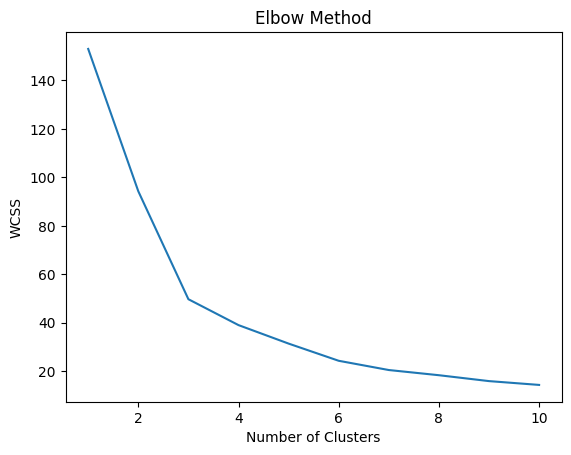

In [2]:
# extract features
features = df[["Unemployment Rate", "Education Cost Per Person", "SNAPs Reliance Rate"]]
features_array = features.values

# standardize the features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The 'elbow' forms at 3 so we will use k=3 clusters

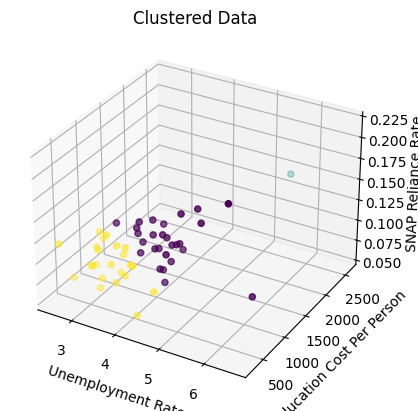

States in cluster 0:
['Alabama', 'Alaska', 'Arizona', 'California', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia']


States in cluster 1:
['District of Columbia']


States in cluster 2:
['Arkansas', 'Colorado', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Maine', 'Maryland', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wisconsin', 'Wyoming']


[['Alabama', 'Alaska', 'Arizona', 'California', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Sout

In [3]:
# specify number of clusters
k = 3

# initialize k-means clustering algorithm
kmeans = KMeans(n_clusters=k, n_init='auto')

# fit the algorithm to the data
kmeans.fit(features_std)

# get the cluster labels for each data point
labels = kmeans.predict(features_std)

# add cluster labels to the data
df["cluster"] = labels

# create 3D scatter plot of the data points with different colors for each cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(features.iloc[:, 0], features.iloc[:, 1], features.iloc[:, 2], c=labels, cmap="viridis")

# add axis labels and a title
ax.set_xlabel("Unemployment Rate")
ax.set_ylabel("Education Cost Per Person")
ax.set_zlabel("SNAP Reliance Rate")
ax.set_title("Clustered Data")

# show the plot
plt.show()

# print out the states in each cluster
clusters = [] # store clusters in 2d array
for i in range(k):
    print(f"States in cluster {i}:")
    print(df[df['cluster'] == i]['State'].tolist())
    print("\n")
    clusters.append(df[df['cluster'] == i]['State'].tolist())

print(clusters)